# Sprint 12: Pronóstico y predicción

##Propósito del proyecto

> Este proyecto de análisis de datos busca conocer los perfiles de usuario de la cadena de gimnasios **Model Fitness** y pronosticar su deserción para generar estrategias de retención y combatir la cancelación.

>En este análisis se estudiarán las condiciones de los datos aportados por la empresa, se limpiarán, ajustarán y se creará un modelo para poder trabajar la predición.


##Tabla de contenidos

 1. [Carga de librerías y datos](#1)
 2. [Análisis Exploratorio de Datos EDA](#2)
 3. [Modelo de clasificación binaria](#3)
 4. [Clústeres de usuarios](#4)
 5. [Conclusiones y recomendaciones](#5)


# 1.-Carga<a id='1'></a>

In [ ]:
#Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Cargar los datos
try:
    df  = pd.read_csv('/content/gym_churn_us.csv')
except:
    df  = pd.read_csv('/datasets/gym_churn_us.csv')


# 2.-Exploratory Data Analysis<a id='2'></a>

##EDA: Análisis de la calidad de las características

In [ ]:
#Analizar los datos proporcionados
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

En los datos proporcionados por el gimnasio tenemos:

4000 observaciones, 13 características, y una variable objetivo: **Churn** que implica la cancelación para el mes en cuestión.

En las características tenemos:

**Datos del usuario:**
*   'gender'
                Tenemos 0 y 1, hace falta una claridad del significado de cada uno.
*   'Near_Location' — si el usuario vive o trabaja en el vecindario donde se encuentra el gimnasio
*   'Partner' — si el usuario es un trabajador de una compañía asociada
*   'Promo_friends' — si el usuario originalmente se inscribió mediante una oferta "trae a un amigo"
*   'Phone' — si el usuario aportó el número de teléfono
*   'Age'- Edad
*   'Lifetime' — el tiempo (en meses) desde que el usuario llegó por primera vez al gimnasio

**Datos de su comportamiento:**
*   'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año
*   'Month_to_end_contract' — los meses que faltan hasta que expire el contrato
*   'Group_visits' — si el usuario participa en sesiones grupales
*   'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente
*   'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso
*   'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.


**De las previas, se consideran varibles categóricas:**
*   'gender'
*   'Near_Location'
*   'Partner'  
*   'Promo_friends' "
*   'Phone'
*   'Contract_period'
*   'Group_visits'

**y variables numéricas:**
*   'Age'
*   'Lifetime'
*   'Month_to_end_contract'
*   'Avg_class_frequency_total'
*   'Avg_class_frequency_current_month'
*   'Avg_additional_charges_total'



Los datos no están relacionados con el tiempo, esto significa que no habrá que predecir series temporales.

Se observa que no hay valores ausentes en los datos.

In [ ]:
df.duplicated().sum()

0

Tampoco hay observaciones duplicadas.

In [ ]:
#Observar los valores promedio y la desviación estándar.
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [ ]:
#Separar en dos grupos, los que cancelaron y los que no.
#Observar las medias del resto de características.
bychurn = df.groupby(['Churn']).mean()
bychurn

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [ ]:
# 0 = se quedaron; 1 = cancelaron.
bychurn = bychurn.rename(index={0:'permanecieron',1:'cancelaron'})
bychurn

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
permanecieron,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
cancelaron,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


##EDA: Formular hipótesis

###Características numéricas

In [ ]:
#Hacer un df con sólo las características numéricas
#(tener en mente que para las correlaciones se toman en cuenta las magintudes de las variables, no las frecuencias)
df_num = df.drop(columns=['gender','Near_Location','Partner','Promo_friends','Phone','Group_visits'])
df_num

,Contract_period,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,6,29,14.227470,5.0,3,0.020398,0.000000,0
1,12,31,113.202938,12.0,7,1.922936,1.910244,0
2,1,28,129.448479,1.0,2,1.859098,1.736502,0
3,12,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...
3995,12,33,2.406023,12.0,8,2.284497,2.349070,0
3996,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,12,28,78.250542,11.0,2,2.786146,2.831439,0
3998,6,32,61.912657,5.0,3,1.630108,1.596237,0


###Histogramas de distribución

<function matplotlib.pyplot.show(close=None, block=None)>

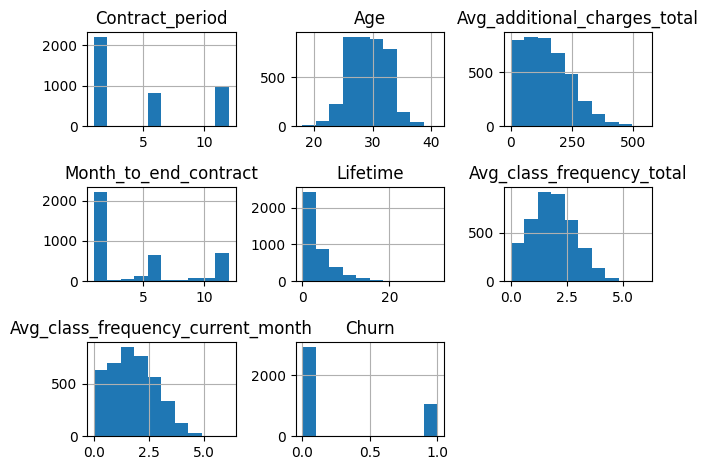

In [ ]:
#histogramas de barras para ver las distribuciones de las características numéricas
df_num.hist()
plt.tight_layout() #Ajustar espacio entre los histogramas
plt.show

###Valores atípicos

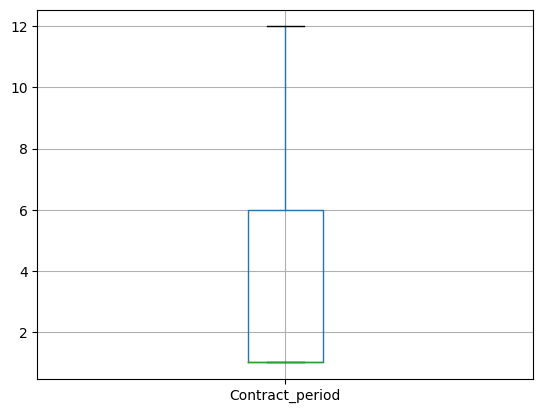

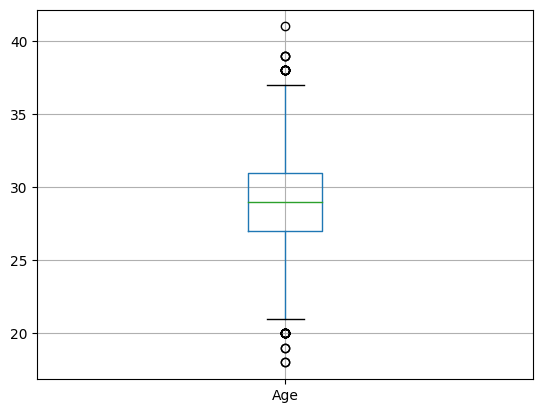

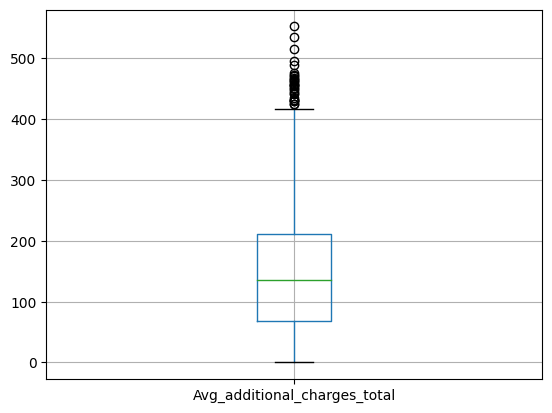

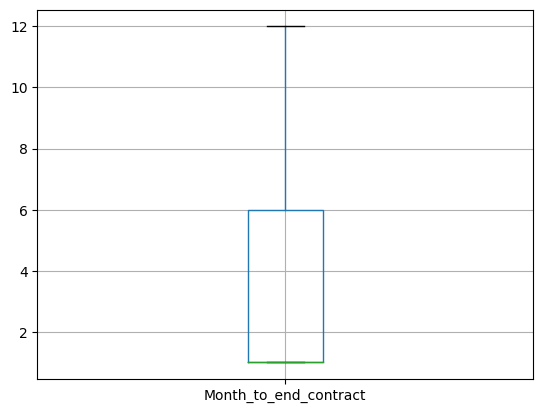

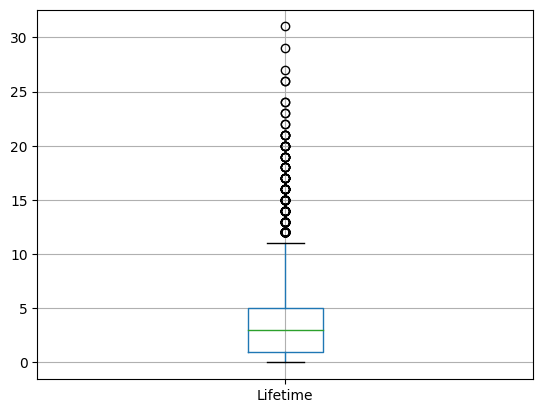

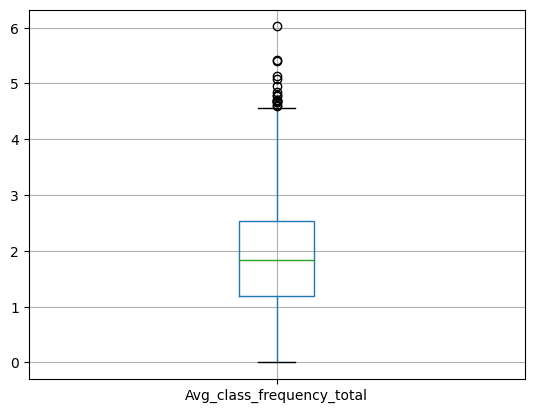

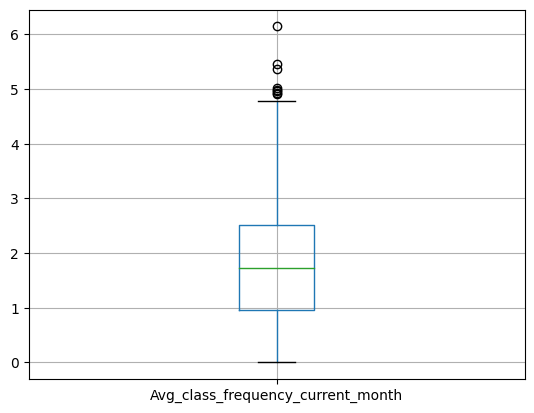

In [ ]:
#Identificar atípicos
for col in df_num.drop('Churn', axis=1).columns:
    df_num.boxplot(column=col)
    plt.show()

Se observan valores atípicos en las variables:
*  Age
*  Avg_additional_charges_total
*  Lifetime'
*  Avg_class_frequency_total'
*  Avg_class_frequency_current_month
     





###Correlaciones

<function matplotlib.pyplot.show(close=None, block=None)>

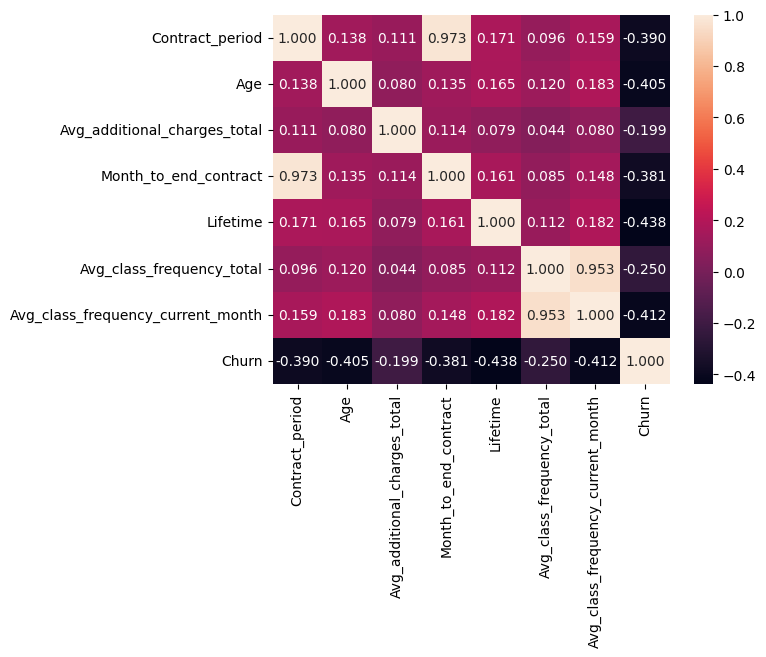

In [ ]:
#Crear y mostrar la matriz de correlación entre las características.

#Coeficiente de correlación de Pearson
#Es positivo, si uno de los valores incrementa junto a otro
#Es cero, si uno cambia y el otro permanece igual
#Es negativo, si uno se reduce mientras el otro incrementa

cm=df_num.corr()
sns.heatmap(cm, annot=True, fmt=".3f")
plt.show

Las correlaciones de las caractrísticas **con la variable objetivo** son negativas, muy cercanas al cero.



Hay dos correlaciones de variables **entre sí** que tienen un coeficiente positivo cercano al 1:

*  la de contract_period y month_to_end_contract =.973, relacionando que entre más meses de contrato, hay más meses faltantes para que acabe ese contrato.

y la de

*  avg_class_frequency_total & avg_class_frecuency_month =.953, relacionando que si la frecuencia media de visitas por semana a lo largo de la vida del cliente es alta, es muy probable que en el mes evaluado.

###Preprocesamiento datos

**Procesar valores ausentes:** No hay valores ausentes que tratar (visto en el paso 2)

**Procesar valores atípicos:** Recordemos las columnas que los contienen:
*  Age
*  Avg_additional_charges_total
*  Lifetime'
*  Avg_class_frequency_total'
*  Avg_class_frequency_current_month

In [ ]:
#Eliminar las observaciones que tienen valores atípicos en cualquier columna

# Calcular los límites de valores atípicos
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

# Filtrar observaciones atípicas en cada columna
df2 = df[~((df < limite_inf) | (df > limite_sup)).any(axis=1)]
df2


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1,1,0,0,1,1,0,26,31.066721,1.0,1,1.157451,0.269597,1
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0


De 4000 observaciones, se eliminaron 1,159 que contenían valores atípicos por lo que nos quedamos con 2841. Se eliminó el 28.9% de los datos.

# 3.-Modelo de clasificación binaria<a id='3'></a>

Construir un modelo para predecir la cancelación de usuarios.

>Target: Churn

>Features: las demás características

In [ ]:
#Dividir los datos en conjuntos de entrenamiento y validación utilizando
#la función train_test_split(). Usar random_state.

X=df2.drop(columns=['Churn'])
y=df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
#Estandarización
from sklearn.preprocessing import StandardScaler

#crear un objeto StandardScaler y aplicarlo al set de entrenamiento
scaler=StandardScaler()
X_train_st=scaler.fit_transform(X_train)

#aplicar la estadarización a la matri de características para el set de prueba
X_test_st=scaler.transform(X_test)

##Regresión logística

In [ ]:
#Entrenar el modelo con regresión logísitica (algoritmo para clasificación binaria)
#Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_st, y_train)

#Predicción para una clase tras entrenar el modelo
y_pred =model.predict(X_test_st)

  #Obtener la probabilidad de que un objeto entre en la clase específica
y_probas = model.predict_proba(X_test_st)

  #construir una matriz de confusión para la clasificación
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)
tn, fp, fn, tp=cm.ravel() #Igualar la matriz para conseguir los valores planeados

#Calcular las métricas de clasificación
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)

print(acc, precision, recall)

0.9279437609841827 0.8698630136986302 0.8523489932885906


##Bosque aleatorio

In [ ]:
#Entrenar el modelo bosque aleatorio
#Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación


from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train_st, y_train)
y_pred=rf_model.predict(X_test_st)

#Calcular las métricas de clasificación
rf_acc=accuracy_score(y_test, y_pred)
rf_precision=precision_score(y_test, y_pred)
rf_recall=recall_score(y_test, y_pred)

print(rf_acc, rf_precision, rf_recall)

0.9209138840070299 0.8513513513513513 0.8456375838926175


##Comparación de las métricas de ambos modelos

In [ ]:
comparacion = {
    'modelo de regresión logística': [acc, precision, recall],
    'modelo de bosque aleatorio': [rf_acc, rf_precision, rf_recall]
}
index = ['accuracy', 'precision', 'recall']

comparacion = pd.DataFrame(comparacion, index=index)
comparacion

,modelo de regresión logística,modelo de bosque aleatorio
accuracy,0.927944,0.920914
precision,0.869863,0.851351
recall,0.852349,0.845638


El modelo de regresión logística parece ser el más eficiente por sus resultados ligeramente más cercanos a 1.

# 4.-Clústeres de usuarios<a id='4'></a>

In [ ]:
#Preparar el df para hacer clústeres de usuarios

#Deja a un lado la columna con datos sobre la cancelación e identifica los clústeres de objetos. (Ya estaba hecho):

X

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1,1,0,0,1,1,0,26,31.066721,1.0,1,1.157451,0.269597
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439


In [ ]:
#Estandarizar los datos
sc=StandardScaler()
X_sc=scaler.fit_transform(X)


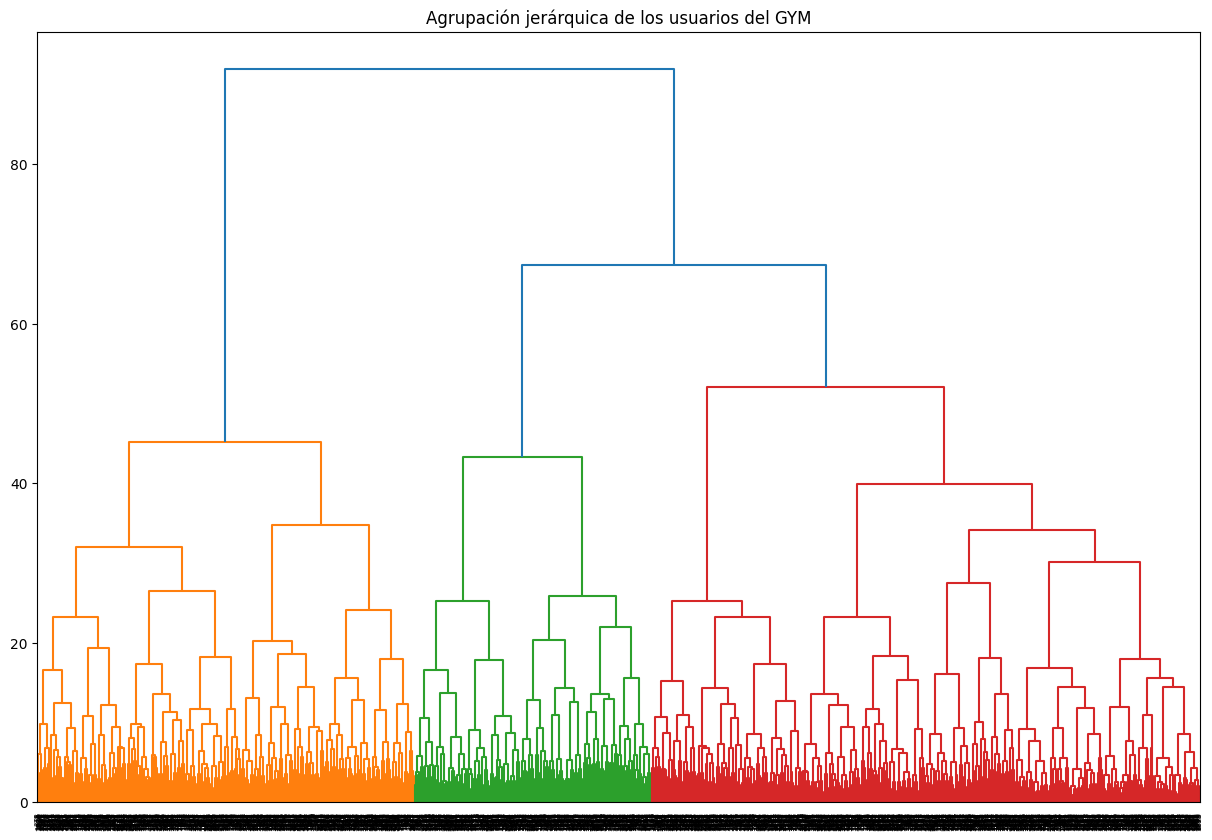

In [ ]:
#crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma.
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_sc, method='ward')

plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica de los usuarios del GYM')
plt.show()

∑


In [ ]:
#Entrenar el modelo de clustering con el algortimo K-means (número de clusters=5) y predice los clústeres de clientes.

km=KMeans(n_clusters=5)
labels=km.fit_predict(X_sc)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Agregar el cluster a cada observación
df2.loc[:, 'cluster'] = labels
df2

<ipython-input-26-96f05d812255>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'cluster'] = labels


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,4
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,1
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1,1,0,0,1,1,0,26,31.066721,1.0,1,1.157451,0.269597,1,3
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0,1
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1,3
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0,1


In [ ]:
#Estudiar los valores medios de caractéristica para cada cluster.
bycluster=df2.groupby('cluster').mean()
bycluster.sort_values(by='Churn')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
1,0.446809,1.0,0.771760,0.529981,1.0,10.549323,0.495164,29.866538,159.323866,9.531915,3.849130,2.817469,2.814059,0.011605
4,0.582339,1.0,0.747017,0.556086,1.0,10.997613,0.618138,29.952267,165.839493,10.114558,4.403341,1.108105,1.099605,0.028640
2,0.571664,1.0,0.197694,0.161450,1.0,2.131796,0.510708,30.308072,161.367873,2.009885,4.342669,2.722052,2.724505,0.054366
0,0.472826,1.0,1.000000,0.568841,1.0,2.405797,0.317029,28.454710,127.247868,2.255435,2.427536,1.410121,1.226197,0.418478
3,0.482574,1.0,0.000000,0.099196,1.0,1.780161,0.332440,28.052279,124.623672,1.706434,1.769437,1.316003,1.053092,0.592493


Los **clústeres 0 y 3** son los que muestran una más alta tasa de cancelación. Entre sus características que son los que:
*  tienen **Contract_period** más pequeños,
*  la cantidades más bajas en **group_visits**,
*  los menores promedios en **Age**,
*  los menores consumos en **Avg_additional_charges_total**,
*  los más bajos meses de su **Lifetime**, y
*  los **Month_to_end_contract** más reducidos.

In [ ]:
#Veamos los índices de los grupos sugeridos por el algoritmo y su frecuencia. (cuantos usuarios hay en cada clúster)
series = pd.Series(labels)
series.value_counts().sort_values()

4    419
1    517
0    552
2    607
3    746
dtype: int64

**El cluster más propenso a cancelar es el 3**, que tiene:
* en **partner** tiene una media de 0.00.
* en **promo_friends** tiene la media más baja, 0.99

Pero en estas caracterísiticas, el siguiente cluster propenso a cancelar, el 0, no coincide con estos bajos niveles.

# 5.-Conclusiones y recomendaciones<a id='5'></a>



De la aplicación de nuestros dos modelos de predicción, los resultados indican que el modelo de **regresión logística** parece ser el más eficiente.

Con respecto a **agrupamiento de los usuarios** según sus caracteristicas, se generaron 5 clústeres y de ellos se tienen las siguientes observaciones:
* **Los clústeres 0 y 3 son los que muestran la más alta tasa de cancelación**.
* En particular el cluster 3 comparte tener medias bajas en practimente todas las características pero hay un comportamiento particular que el cluster 0 no tiene:
  * En **partner** tiene una media de 0.00, lo que significa que nadie en este grupo es un trabajador en una compañía asociada por lo que se observa que aquí hay un potencial de retención de usuarios a través de las partnerships laborales.
  * En **promo_friends**, es decir, si el usuario originalmente se inscribió mediante una oferta "trae a un amigo", tiene la media más baja de todos los clústeres, 0.99, lo que indica que el factor social de compañía y amigos influye fuertemente en la motivación para permanecer asistiendo al gimnasio.

Se recomienda fuertemente considerar en particular estos últimos dos factores para prevenir la deserción de usuarios con las características del cluster 3 que es el que refleja la tasa de cancelación más significativa.

